### class mapping

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# def get_palette(num_cls):
#     """Returns the color map for visualizing the segmentation mask.
#     Args:
#         num_cls: Number of classes
#     Returns:
#         The color map
#     """
#     n = num_cls
#     palette = [0] * (n * 3)
#     for j in range(0, n):
#         lab = j
#         palette[j * 3 + 0] = 0
#         palette[j * 3 + 1] = 0
#         palette[j * 3 + 2] = 0
#         i = 0
#         while lab:
#             palette[j * 3 + 0] |= ((lab >> 0) & 1) << (7 - i)
#             palette[j * 3 + 1] |= ((lab >> 1) & 1) << (7 - i)
#             palette[j * 3 + 2] |= ((lab >> 2) & 1) << (7 - i)
#             i += 1
#             lab >>= 3
#     return palette

# palette = get_palette(6)

# # class_to_color = {
# #     0: (1, 0, 0),    # Class 0 (e.g., "person") mapped to red
# #     1: (0, 1, 0),    # Class 1 (e.g., "car") mapped to green
# #     2: (0, 0, 1),    # Class 2 (e.g., "tree") mapped to blue
# #     # Add more classes and colors as needed
# # }

# class_to_color = dict()
# class_name = ['background', 'tops', 'sweater', 'outerwear', 'bottoms', 'wholebody']
# for idx, i in enumerate(range(len(palette) // 3)):
#     class_to_color[idx] = (palette[i*3] / 255., palette[i*3+1] / 255., palette[i*3+2] / 255.)
# print(class_to_color)

# # Create a sample segmentation mask (class labels)
# width, height = 10, 10
# segmentation_mask = np.random.randint(low=0, high=len(class_to_color), size=(height, width))

# # Create an RGB image based on the segmentation mask
# rgb_image = np.zeros((height, width, 3), dtype=np.uint8)
# for class_label, color in class_to_color.items():
#     rgb_image[segmentation_mask == class_label] = color

# im = Image.fromarray(rgb_image, mode="RGB")

# # Create a legend
# legend_elements = [plt.Line2D([], [], marker='s', color='w', markerfacecolor=color, markersize=10, linewidth=0, label=f"{class_name[class_label]}")
#                    for class_label, color in class_to_color.items()]

# plt.figure(figsize=(10, 10))
# plt.imshow(np.asarray(im))
# plt.axis('off')
# plt.title("Class-to-Color Mapping Example")
# # plt.legend(handles=legend_elements, loc='upper right', handlelength=0.7, handleheight=1)
# plt.legend(handles=legend_elements, loc='center', fontsize="xx-large")
# plt.show()

### model training

In [1]:
import torch
import numpy as np
# from options.base_options import parser
# from networks import U2NET
# from utils.saving_utils import load_checkpoint

# opt = parser()

# device = torch.device("cuda:0")

# # Define model
# u_net = U2NET(in_ch=3, out_ch=6)
# u_net = load_checkpoint(u_net, opt.unet_checkpoint)
# u_net = u_net.to(device)

# # Define optimizer with weight decay
# optimizer = torch.optim.Adam(u_net.parameters(), lr=opt.lr, weight_decay=1e-5)

# # Define learning rate scheduler
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1) 
# # torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

# # loss function
# weights = np.array([1, 1.5, 1.5, 1.5, 1.5, 1.5], dtype=np.float32)
# weights = torch.from_numpy(weights).to(device)
# loss_CE = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# # Mixed Precision Training
# scaler = torch.cuda.amp.GradScaler()

# u_net.train()
# for itr, data_batch in enumerate(trainloader):
#     image, label = data_batch

#     optimizer.zero_grad()

#     with torch.cuda.amp.autocast():
#         d0, d1, d2, d3, d4, d5, d6 = u_net(image)
#         loss0 = loss_CE(d0, label)
#     loss0.backward()
#     if opt.clip_grad != 0:
#         torch.nn.utils.clip_grad_norm_(u_net.parameters(), opt.clip_grad)
#     optimizer.step()

#     # scaler.scale(loss0).backward()
#     # scaler.step(optimizer)
#     # scaler.update()

#     # Step the scheduler
#     scheduler.step()

#     u_net.eval()
#     with torch.no_grad():
#         while True:
#             exec(input(">>> "))

/home/hykao/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
import json

with open("/home/hykao/Taelor/merge/runs/labelme2coco/dataset.json") as file:
    data = json.load(file)
data.keys()

dict_keys(['images', 'annotations', 'categories'])

In [66]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
coco = COCO("/home/hykao/Taelor/merge/runs/labelme2coco/dataset.json")

imgId = 1
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
anns = coco.loadAnns(ann_ids)
image_path = coco.loadImgs(imgId)[0]['file_name']
print(coco.loadImgs(imgId))
coco.annToMask(anns[0])

loading annotations into memory...
Done (t=0.23s)
creating index...
index created!
[{'height': 1800, 'width': 1200, 'id': 1, 'file_name': 'bottoms/8183510368469-0.jpg'}]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

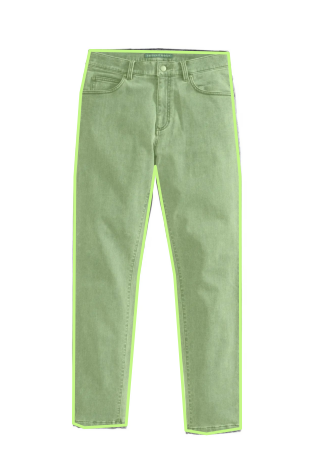

In [57]:
anns
image = plt.imread("../merge/" + image_path)
plt.imshow(image)
coco.showAnns(anns)

plt.axis('off')
plt.tight_layout()

In [38]:
data['annotations'][0]['segmentation']

[[786,
  1695,
  703,
  1681,
  658,
  1060,
  581,
  624,
  513,
  1066,
  464,
  1660,
  297,
  1670,
  253,
  1653,
  259,
  667,
  283,
  331,
  319,
  161,
  873,
  172,
  920,
  666,
  922,
  1673]]

In [39]:
import json
import numpy as np
from labelme import utils
import PIL.Image
import io

# Path to your LabelMe JSON annotation file
json_file_path = '/home/hykao/Taelor/outerwear/8183510073557-0.json'

# Load JSON data
with open(json_file_path) as f:
    data = json.load(f)

# Image shape, replace with (height, width) if known or use data['imageHeight'], data['imageWidth']
img_shape = (data['imageHeight'], data['imageWidth'], 3)

# Convert polygons to a label mask
label_names = [shape['label'] for shape in data['shapes']]
label_map = {'tops':1, 'sweaters':3, 'outerwear':5, 'bottoms':7, 'wholebody':11}
label_mask = np.zeros(img_shape[:2], dtype=np.uint8)

for shape in data['shapes']:
    points = shape['points']
    # points = list()
    # for i in range(int(len(shape['points']) / 2)):
    #     points.append([shape['points'][i], shape['points'][i + 1]])
    # points.append(shape['points'][0::2])
    # points.append(shape['points'][1::2])

    label_name = shape['label']
    label_id = label_map[label_name]
    
    # Convert polygon to mask
    mask = utils.shape_to_mask(img_shape[:2], points)
    label_mask[mask] = label_id

# Optionally, convert label IDs to color
label_colormap = utils.label_colormap(255)
print(label_mask)
colored_label_image = (label_colormap[label_mask] * 255).astype(np.uint8)
# print(label_colormap)

# Display results or save if needed
pil = PIL.Image.fromarray(label_mask * 23)
print(label_mask)
# pil = PIL.Image.new('L', img_shape[:2], color = 'red')
print(np.asarray(pil))
pil.save("test.png")

TypeError: 'int' object is not iterable

### dataset exploration

In [1]:
import os
import numpy as np
from PIL import Image
import collections
from tqdm import tqdm
import pprint

In [2]:
from data.custom_dataset_data_loader import CustomDatasetDataLoader, CreateDataset, sample_data

from options.base_options import parser
# from options.argparse_opt import parser

/home/hykao/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
opt = parser()

# custom_dataloader = CustomDatasetDataLoader()
# custom_dataloader.initialize(opt)
# trainloader, validloader = custom_dataloader.get_loader()

# # dataset_size = len(custom_dataloader)
# # print("Total number of images avaliable for training: %d" % dataset_size)

# pbar = range(1, opt.iter+1)
# get_data = sample_data(trainloader)

In [4]:
dataset = CreateDataset(opt)

100%|██████████| 200/200 [00:00<00:00, 23988.70it/s]

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
dataset [AlignedDataset] was created


In [24]:
dataset[0][1]

8183510368469-0.jpg
0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: ImageId, Length: 200, dtype: bool
Index([13], dtype='int64')


tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [28]:
import PIL.Image
pil = PIL.Image.fromarray(np.asarray(dataset[0][1] * 23).astype(np.uint8))
pil.save("test.png")

8183510368469-0.jpg
0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: ImageId, Length: 200, dtype: bool
Index([13], dtype='int64')


In [5]:
dataset.df

AttributeError: 'AlignedDataset' object has no attribute 'df'

In [15]:
(dataset.df['CategoryId'] == dataset.df.ClassId.apply(lambda x: str(x).split("_")[0])).sum()

331213

In [12]:
np.unique(dataset.df.ClassId.values, return_counts=True)

(array(['0', '0_0_10_12_20_40_60_61_69_87', '0_0_10_12_20_41_46_61_87',
        ..., '9_9_20_42_55_62_91', '9_9_20_43_60_72_91', '9_9_20_43_61_91'],
       dtype=object),
 array([5541,    1,    1, ...,    1,    2,    1]))

In [16]:
dataset.df["CategoryId"] = dataset.df.ClassId.apply(lambda x: str(x).split("_")[0])
dataset.df

,ImageId,EncodedPixels,Height,Width,ClassId,CategoryId
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,6
1,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,0
2,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,28
3,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,31
4,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,32
...,...,...,...,...,...,...
331208,fffe20b555b98c3c1f26c8dfff275cbc.jpg,2712731 8 2715725 23 2718719 39 2721713 55 272...,3000,2001,28,28
331209,ffffbf7014a9e408bfbb81a75bc70638.jpg,71179 1 71678 3 72178 4 72678 4 73178 5 73679 ...,500,375,33,33
331210,ffffbf7014a9e408bfbb81a75bc70638.jpg,116648 5 117148 16 117648 22 118148 26 118647 ...,500,375,31,31
331211,ffffbf7014a9e408bfbb81a75bc70638.jpg,67711 1 68210 1 68709 2 69204 2 69208 3 69705 ...,500,375,31,31


In [5]:
temp_df = (
    dataset.df.groupby("ImageId")[["EncodedPixels", "CategoryId"]]
    .agg(lambda x: list(x))
    .reset_index()
)
temp_df

,ImageId,EncodedPixels,CategoryId
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,[6068157 7 6073371 20 6078584 34 6083797 48 60...,"[6, 0, 28, 31, 32, 32, 31, 29, 4]"
1,0000fe7c9191fba733c8a69cfaf962b7.jpg,[2201176 1 2203623 3 2206071 5 2208518 8 22109...,"[33, 1]"
2,0002ec21ddb8477e98b2cbb87ea2e269.jpg,[2673735 2 2676734 8 2679734 13 2682733 19 268...,"[33, 10, 23, 23]"
3,0002f5a0ebc162ecfb73e2c91e3b8f62.jpg,[435 132 1002 132 1569 132 2136 132 2703 132 3...,"[10, 33, 15]"
4,0004467156e47b0eb6de4aa6479cbd15.jpg,[132663 8 133396 25 134130 41 134868 53 135611...,"[10, 33, 31, 31, 15]"
...,...,...,...
45190,fff8d9bd5ad4354b66355dd797942b42.jpg,[408993 3 410489 8 411985 13 413481 19 414977 ...,"[10, 23, 23, 33]"
45191,fffb65463df408e308983ef743b77491.jpg,[3102750 3 3102758 3 3105751 11 3108751 11 311...,"[33, 1, 31, 31, 18, 19, 34, 6, 23, 23]"
45192,fffc631acce2e28e1628de685d40c980.jpg,[283951 5 284926 6 285901 10 286876 15 287851 ...,"[13, 31, 31, 10, 32, 18, 24, 23, 23, 28]"
45193,fffe20b555b98c3c1f26c8dfff275cbc.jpg,[2446541 2 2449539 5 2452536 10 2455534 14 245...,"[31, 4, 31, 31, 32, 32, 32, 19, 23, 23, 34, 6,..."


In [6]:
size_df = dataset.df.groupby("ImageId")[["Height", "Width"]].mean().reset_index()
temp_df = temp_df.merge(size_df, on="ImageId", how="left")
temp_df

,ImageId,EncodedPixels,CategoryId,Height,Width
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,[6068157 7 6073371 20 6078584 34 6083797 48 60...,"[6, 0, 28, 31, 32, 32, 31, 29, 4]",5214.0,3676.0
1,0000fe7c9191fba733c8a69cfaf962b7.jpg,[2201176 1 2203623 3 2206071 5 2208518 8 22109...,"[33, 1]",2448.0,2448.0
2,0002ec21ddb8477e98b2cbb87ea2e269.jpg,[2673735 2 2676734 8 2679734 13 2682733 19 268...,"[33, 10, 23, 23]",3000.0,1997.0
3,0002f5a0ebc162ecfb73e2c91e3b8f62.jpg,[435 132 1002 132 1569 132 2136 132 2703 132 3...,"[10, 33, 15]",567.0,400.0
4,0004467156e47b0eb6de4aa6479cbd15.jpg,[132663 8 133396 25 134130 41 134868 53 135611...,"[10, 33, 31, 31, 15]",750.0,500.0
...,...,...,...,...,...
45190,fff8d9bd5ad4354b66355dd797942b42.jpg,[408993 3 410489 8 411985 13 413481 19 414977 ...,"[10, 23, 23, 33]",1500.0,1000.0
45191,fffb65463df408e308983ef743b77491.jpg,[3102750 3 3102758 3 3105751 11 3108751 11 311...,"[33, 1, 31, 31, 18, 19, 34, 6, 23, 23]",3000.0,2247.0
45192,fffc631acce2e28e1628de685d40c980.jpg,[283951 5 284926 6 285901 10 286876 15 287851 ...,"[13, 31, 31, 10, 32, 18, 24, 23, 23, 28]",975.0,650.0
45193,fffe20b555b98c3c1f26c8dfff275cbc.jpg,[2446541 2 2449539 5 2452536 10 2455534 14 245...,"[31, 4, 31, 31, 32, 32, 32, 19, 23, 23, 34, 6,...",3000.0,2001.0


In [134]:
# temp_copy = temp_df.copy()
# selected = os.listdir("../imaterialist/train_male/")
# for idx, row in temp_copy.iterrows():
#     if row['ImageId'] not in selected:
#         temp_copy.drop(idx, inplace=True)
temp_copy.reset_index(drop=True)

,ImageId,EncodedPixels,CategoryId,Height,Width
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,[6068157 7 6073371 20 6078584 34 6083797 48 60...,"[6, 0, 28, 31, 32, 32, 31, 29, 4]",5214.0,3676.0
1,00102686c01fa625aba3b2478f48f415.jpg,[1030495 6 1032230 18 1033965 30 1035701 41 10...,"[31, 31, 33, 10]",1742.0,1500.0
2,001657dc6f979869ebf38ea741e90675.jpg,[82835 1 84831 4 86827 6 88823 9 90819 11 9281...,"[1, 33, 31, 31, 18]",1998.0,1141.0
3,0017a7bb9e2d8a0f44ce040ed164eea6.jpg,[179500 6 180515 16 181534 22 182557 25 183579...,"[10, 31, 31, 29, 23, 23]",1024.0,680.0
4,002037fce71bdd9046a125e6e7afc0e0.jpg,[396653 1 397613 1 398573 1 399533 2 400493 2 ...,"[33, 10, 23, 23]",960.0,788.0
...,...,...,...,...,...
7195,ffdeea167e11454e72d07f58c3ff7d8e.jpg,[2859 141 5858 142 8857 143 11857 143 14856 14...,"[10, 23, 23, 24]",3000.0,2001.0
7196,ffe011e941a22c02ef0be02a922d44b7.jpg,[3609999 5 3615276 14 3620552 24 3625829 29 36...,"[6, 32, 32, 0, 28, 2, 36, 36, 36, 31, 31, 33]",5278.0,3519.0
7197,fff132f7ce55db363a1afc4fda330ffc.jpg,[1853783 19 1856782 22 1859781 24 1862780 26 1...,"[23, 23, 19, 34, 6, 32, 0, 28, 16, 31, 32, 32,...",3000.0,1997.0
7198,fff3ae4585d776922829ceb887789be4.jpg,[143416 1 144136 3 144856 3 145575 4 146295 4 ...,"[13, 4, 25, 1, 31, 31, 28, 32, 32, 35, 6, 33, ...",720.0,480.0


In [156]:
temp_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 0 to 45193
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ImageId        7200 non-null   object 
 1   EncodedPixels  7200 non-null   object 
 2   CategoryId     7200 non-null   object 
 3   Height         7200 non-null   float64
 4   Width          7200 non-null   float64
dtypes: float64(2), object(3)
memory usage: 337.5+ KB


custom dataset

In [4]:
import glob
import json
import cv2
import pandas as pd

lbl_name = {'tops':1, 'sweaters':3, 'outerwear':5, 'bottoms':7, 'wholebody':11}
custom = glob.glob("../*/*-*.json")
nested = []
for each in custom:
    splits = each.rsplit('/', 1)
    fname = splits[1][:-5]
    lbl_file = json.load(open(each))
    for lbl_ins in lbl_file['shapes']:
        lbl = str(lbl_name[lbl_ins['label']])
        pts = ' '.join(map(str, lbl_ins['points']))
        img_id = fname + '.jpg'
        img = cv2.imread(f'{splits[0]}/{img_id}')
        cv2.imwrite("../imaterialist/taelor/" + img_id, img)
        h, w, _ = img.shape
        nested.append([img_id, pts, lbl, h*1.0, w*1.0])
custom_df = pd.DataFrame(nested, columns=['ImageId', 'EncodedPixels', 'CategoryId',	'Height', 'Width'])

concat_df = pd.concat([custom_df.groupby("ImageId")[["EncodedPixels", "CategoryId"]].agg(lambda x: list(x)), custom_df.groupby("ImageId")[["Height", "Width"]].mean()], axis=1)
concat_df.reset_index(inplace=True)
# final_df = pd.concat([temp_copy, concat_df]).reset_index(drop=True)
# final_df
concat_df

,ImageId,EncodedPixels,CategoryId,Height,Width
0,8183509647573-0.jpg,[1469 2057 1335 2052 1256 1390 1241 1888 1237 ...,[5],2133.0,1600.0
1,8183509876949-0.jpg,[464 1736 392 1731 355 1687 371 1019 347 762 1...,[1],1760.0,1460.0
2,8183509942485-0.jpg,[1304 1736 1270 1721 1220 1333 1110 893 1123 1...,[3],1760.0,1460.0
3,8183509975253-1.jpg,[0 1459 1459 1459 1459 419 1234 329 1213 289 1...,[5],1460.0,1460.0
4,8183510008021-1.jpg,[1459 1459 1459 438 1308 366 1293 338 1168 217...,[5],1460.0,1460.0
...,...,...,...,...,...
195,8183744626901-2.jpg,[507 1307 491 1295 490 1244 472 1194 463 1074 ...,"[7, 3]",1500.0,1125.0
196,8183752098005-0.jpg,[790 3307 739 2968 636 2515 770 2565 999 2568 ...,"[7, 3]",3308.0,2200.0
197,8183757865173-0.jpg,[911 3660 862 3470 825 3163 825 3005 969 3052 ...,"[7, 3]",3661.0,2746.0
198,8183761764565-2.jpg,[946 3823 959 3662 912 3460 923 3075 1139 3117...,"[7, 3]",3824.0,2868.0


In [6]:
concat_df.to_csv('eval.csv', index=None)
# final_df = concat_df.copy()

In [10]:
final_df["EncodedPixels"] = final_df["EncodedPixels"].str.join(sep=' ')
final_df["CategoryId"] = final_df["CategoryId"].str.join(sep=' ')
final_df

,ImageId,EncodedPixels,CategoryId,Height,Width
0,8183510073557-0.jpg,851 1909 816 1845 801 1890 766 1897 686 1880 6...,5 7 7,1946.0,1460.0
1,8183513645269-0.jpg,253 492 239 491 232 487 225 445 222 448 219 47...,7 1 5,700.0,467.0
2,8183513645269-2.jpg,236 499 203 498 186 493 170 492 168 490 168 45...,7 1 5,700.0,467.0
3,8183513710805-0.jpg,257 620 237 618 225 600 230 570 230 450 225 41...,7 1 5,700.0,467.0
4,8183513710805-2.jpg,230 615 224 613 215 582 220 506 185 579 172 58...,7 1 5 5,700.0,467.0
5,8183514235093-0.jpg,458 1459 436 1335 424 1195 497 1226 617 1238 6...,7 1 5,1460.0,1460.0
6,8183514431701-0.jpg,974 1184 776 1177 750 1154 749 362 786 216 825...,5 7 7 1 5,1460.0,1460.0
7,8183514726613-0.jpg,787 660 778 657 740 551 710 435 688 182 668 15...,1 5 7 7,2392.0,1560.0
8,8183514988757-0.jpg,221 1077 223 929 411 946 596 938 591 1077 456 ...,7 5,1078.0,822.0
9,8183515185365-0.jpg,278 1466 280 1421 323 1401 312 1382 324 1358 3...,7 1 5,1467.0,1200.0


In [188]:
print(temp_df.loc[7229, 'EncodedPixels'])

['5727783 9 5730607 27 5733431 45 5736263 55 5739103 58 5741942 61 5744782 63 5747622 65 5750461 68 5753301 70 5756141 72 5758980 75 5761820 77 5764659 80 5767499 82 5770339 84 5773178 87 5776018 89 5778857 92 5781697 94 5784537 96 5784879 5 5787376 99 5787713 15 5790216 101 5790548 24 5793056 103 5793383 34 5795895 106 5796217 44 5798735 108 5799052 53 5801574 111 5801886 64 5804414 113 5804721 73 5807254 115 5807556 82 5810093 118 5810390 93 5812933 120 5813225 102 5815773 122 5816059 112 5818612 125 5818894 121 5821452 127 5821729 130 5824291 130 5824563 140 5827131 132 5827367 180 5829971 134 5830140 250 5832809 425 5835646 432 5838483 439 5841320 446 5844158 452 5846995 458 5849832 466 5852669 474 5855506 482 5858343 489 5861181 496 5864018 504 5866855 512 5869692 518 5872529 522 5875366 526 5878204 529 5881041 533 5883878 537 5886716 540 5889555 542 5892394 544 5895232 547 5895805 6 5898071 549 5898646 19 5900910 551 5901487 26 5903749 553 5904328 26 5906588 555 5907169 26 590942

In [9]:
image_info = collections.defaultdict(dict)
tops = [0, 1]
sweater = [2, 3]
outerwear = [4, 5, 9]
bottoms = [6, 7, 8]
wholebody = [10, 11, 12]
def zero(): return 0

for index, row in tqdm(temp_df.iterrows(), total=len(temp_df)):
    image_id = row["ImageId"]
    image_path = os.path.join(opt.image_folder, image_id)
    image_info[index]["image_id"] = image_id
    image_info[index]["image_path"] = image_path
    image_info[index]["width"] = opt.fine_width
    image_info[index]["height"] = opt.fine_height
    image_info[index]["labels"] = row["CategoryId"]
    image_info[index]["orig_height"] = int(row["Height"])
    image_info[index]["orig_width"] = int(row["Width"])
    image_info[index]["annotations"] = row["EncodedPixels"]
    image_info[index]["distribution"] = collections.defaultdict(zero)
    for cid, ann in zip(image_info[index]["labels"], image_info[index]["annotations"]):
        cid = int(cid)
        if cid > 12:
            continue
        else:
            cnt = np.sum(rle_decode(ann, (int(row["Height"]), int(row["Width"]))))
            if cid in tops:
                image_info[index]["distribution"][1] += cnt
            elif cid in sweater:
                image_info[index]["distribution"][2] += cnt
            elif cid in outerwear:
                image_info[index]["distribution"][3] += cnt
            elif cid in bottoms:
                image_info[index]["distribution"][4] += cnt
            elif cid in wholebody:
                image_info[index]["distribution"][5] += cnt
    # break

100%|██████████| 45195/45195 [04:23<00:00, 171.51it/s]


In [37]:
info = image_info[0]
info

{'image_id': '00000663ed1ff0c4e0132b9b9ac53f6e.jpg',
 'image_path': '../imaterialist/train/00000663ed1ff0c4e0132b9b9ac53f6e.jpg',
 'width': 768,
 'height': 768,
 'labels': ['6', '0', '28', '31', '32', '32', '31', '29', '4'],
 'orig_height': 5214,
 'orig_width': 3676,
 'annotations': ['6068157 7 6073371 20 6078584 34 6083797 48 6089010 62 6094223 72 6099436 76 6104649 80 6109862 85 6115075 89 6120288 93 6125501 98 6130714 102 6135927 106 6141140 111 6146354 114 6151567 118 6156780 123 6161993 127 6167206 131 6172419 136 6177632 140 6182845 144 6188058 149 6193271 153 6198484 157 6203697 162 6208910 166 6214124 169 6219337 174 6224550 178 6229763 182 6234976 187 6240189 191 6245402 195 6250615 200 6255828 204 6261041 208 6266254 213 6271467 218 6276680 224 6281893 229 6287107 233 6292320 238 6297533 244 6302746 249 6307959 254 6313172 259 6318385 265 6323598 270 6328811 275 6334024 280 6339237 286 6344450 291 6349663 296 6354877 300 6360090 306 6365303 311 6370516 316 6375729 322 6380942

(5214, 3676, 3)
(5214, 3676, 3)
(3676, 5214)


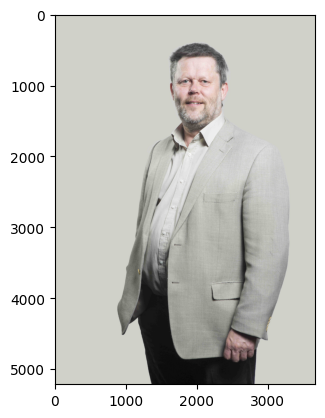

In [141]:
img_path = image_info[0]["image_path"]
img = Image.open(img_path).convert("RGB")
print(np.asarray(img).shape)
print(img.size)
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


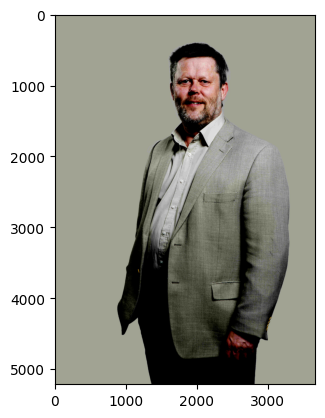

In [124]:
plt.imshow(dataset.transform_rgb(img).permute(1,2,0))

#### label distributions & \_\_getitem\_\_

In [16]:
dist = np.zeros((len(image_info), 6))
for idx in range(len(image_info)):
    info = image_info[idx]
    h, w = info["orig_height"], info["orig_width"]
    percent = 0.0
    for c in range(1, 6):
        num = info["distribution"][c] / h / w
        dist[idx][c] = num
        percent += num
    dist[idx][0] = 1.0 - percent
print(dist)

[[0.64154065 0.04898474 0.         0.26339143 0.04608319 0.        ]
 [0.63820189 0.36179811 0.         0.         0.         0.        ]
 [0.91592405 0.         0.         0.         0.         0.08407595]
 ...
 [0.91299724 0.         0.         0.         0.         0.08700276]
 [0.85166467 0.0105359  0.         0.09402032 0.04377911 0.        ]
 [0.85069867 0.         0.         0.         0.         0.14930133]]


In [20]:
size_df['%tops'] = dist[:, 1]
size_df['%sweater'] = dist[:, 2]
size_df['%outerwear'] = dist[:, 3]
size_df['%bottoms'] = dist[:, 4]
size_df['%wholebody'] = dist[:, 5]
size_df['%background'] = dist[:, 0]
size_df

,ImageId,Height,Width,%tops,%sweater,%outerwear,%bottoms,%wholebody,%background
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,5214.0,3676.0,0.048985,0.0,0.263391,0.046083,0.000000,0.641541
1,0000fe7c9191fba733c8a69cfaf962b7.jpg,2448.0,2448.0,0.361798,0.0,0.000000,0.000000,0.000000,0.638202
2,0002ec21ddb8477e98b2cbb87ea2e269.jpg,3000.0,1997.0,0.000000,0.0,0.000000,0.000000,0.084076,0.915924
3,0002f5a0ebc162ecfb73e2c91e3b8f62.jpg,567.0,400.0,0.000000,0.0,0.000000,0.000000,0.484705,0.515295
4,0004467156e47b0eb6de4aa6479cbd15.jpg,750.0,500.0,0.000000,0.0,0.000000,0.000000,0.191579,0.808421
...,...,...,...,...,...,...,...,...,...
45190,fff8d9bd5ad4354b66355dd797942b42.jpg,1500.0,1000.0,0.000000,0.0,0.000000,0.000000,0.065370,0.934630
45191,fffb65463df408e308983ef743b77491.jpg,3000.0,2247.0,0.057635,0.0,0.000000,0.055877,0.000000,0.886488
45192,fffc631acce2e28e1628de685d40c980.jpg,975.0,650.0,0.000000,0.0,0.000000,0.000000,0.087003,0.912997
45193,fffe20b555b98c3c1f26c8dfff275cbc.jpg,3000.0,2001.0,0.010536,0.0,0.094020,0.043779,0.000000,0.851665


In [42]:
all_pixel_img, all_pixel_top, all_pixel_swe, all_pixel_out, all_pixel_bot, all_pixel_who, all_pixel_bac = 0, 0, 0, 0, 0, 0, 0
for index, row in size_df.iterrows():
    all_pixel_img += row['Height'] * row['Width']
    all_pixel_top += round(row['%tops'] * row['Height'] * row['Width'])
    all_pixel_swe += round(row['%sweater'] * row['Height'] * row['Width'])
    all_pixel_out += round(row['%outerwear'] * row['Height'] * row['Width'])
    all_pixel_bot += round(row['%bottoms'] * row['Height'] * row['Width'])
    all_pixel_who += round(row['%wholebody'] * row['Height'] * row['Width'])
    all_pixel_bac += round(row['%background'] * row['Height'] * row['Width'])
print(all_pixel_top, all_pixel_swe, all_pixel_out, all_pixel_bot, all_pixel_who, all_pixel_bac)

10788273482 2182250613 8198080384 7445056273 12331477390 206209807085


{0: (0.0, 0.0, 0.0), 1: (0.5019607843137255, 0.0, 0.0), 2: (0.0, 0.5019607843137255, 0.0), 3: (0.5019607843137255, 0.5019607843137255, 0.0), 4: (0.0, 0.0, 0.5019607843137255), 5: (0.5019607843137255, 0.0, 0.5019607843137255)}


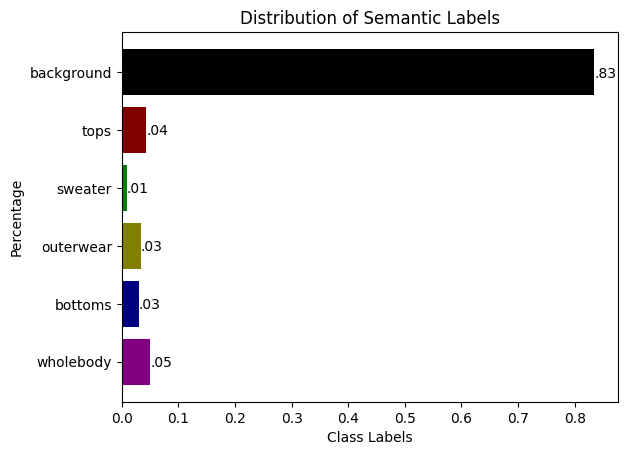

In [74]:
import matplotlib.pyplot as plt

def get_palette(num_cls):
    """Returns the color map for visualizing the segmentation mask.
    Args:
        num_cls: Number of classes
    Returns:
        The color map
    """
    n = num_cls
    palette = [0] * (n * 3)
    for j in range(0, n):
        lab = j
        palette[j * 3 + 0] = 0
        palette[j * 3 + 1] = 0
        palette[j * 3 + 2] = 0
        i = 0
        while lab:
            palette[j * 3 + 0] |= ((lab >> 0) & 1) << (7 - i)
            palette[j * 3 + 1] |= ((lab >> 1) & 1) << (7 - i)
            palette[j * 3 + 2] |= ((lab >> 2) & 1) << (7 - i)
            i += 1
            lab >>= 3
    return palette

palette = get_palette(6)

class_to_color = dict()
for idx, i in enumerate(range(len(palette) // 3)):
    class_to_color[idx] = (palette[i*3] / 255., palette[i*3+1] / 255., palette[i*3+2] / 255.)
print(class_to_color)

unique = ['background', 'tops', 'sweater', 'outerwear', 'bottoms', 'wholebody']
counts = np.array([all_pixel_bac, all_pixel_top, all_pixel_swe, all_pixel_out, all_pixel_bot, all_pixel_who]) / all_pixel_img
label_distribution = dict(zip(unique, counts))

plt.barh(list(label_distribution.keys())[::-1], list(label_distribution.values())[::-1], color=[class_to_color[i] for i in range(5,-1,-1)])
for index, value in enumerate(counts[::-1]):
    plt.text(value, index - 0.09, str(round(value, 2))[1:])
plt.xlabel('Class Labels')
plt.ylabel('Percentage')
plt.title('Distribution of Semantic Labels')
plt.show()

In [8]:
def rle_decode(mask_rle, shape):
    """
    mask_rle: run-length as string formated: [start0] [length0] [start1] [length1]... in 1d array
    shape: (height,width) of array to return
    Returns numpy array according to the shape, 1 - mask, 0 - background
    """
    shape = (shape[1], shape[0])
    s = mask_rle.split()
    # gets starts & lengths 1d arrays
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0::2], s[1::2])]
    starts -= 1
    # gets ends 1d array
    ends = starts + lengths
    # creates blank mask image 1d array
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    # sets mark pixles
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    # reshape as a 2d mask image
    return img.reshape(shape).T  # Needed to align to RLE direction

In [54]:
mask = np.zeros(
    (len(info["annotations"]), opt.fine_width, opt.fine_height), dtype=np.uint8
)
labels = []
for m, (annotation, label) in enumerate(
    zip(info["annotations"], info["labels"])
):
    sub_mask = rle_decode(
        annotation, (info["orig_height"], info["orig_width"])
    )
    sub_mask = Image.fromarray(sub_mask)
    sub_mask = sub_mask.resize(
        (opt.fine_width, opt.fine_height), resample=Image.BICUBIC
    )
    mask[m, :, :] = sub_mask
    labels.append(int(label) + 1)

In [52]:
for lo, hi in zip(starts, ends):
    print(lo, hi)

8521388 8521398
8526584 8526614
8531788 8531830
8537001 8537047
8542214 8542263
8547427 8547479
8552640 8552695
8557853 8557911
8563066 8563127
8568278 8568344
8573491 8573560
8578704 8578776
8583917 8583992
8589130 8589208
8594343 8594425
8599556 8599641
8604768 8604857
8609981 8610073
8615194 8615289
8620407 8620505
8625620 8625722
8630833 8630938
8636046 8636154
8641258 8641370
8646471 8646586
8651684 8651802
8656897 8657019
8662110 8662235
8667323 8667451
8672536 8672667
8677749 8677883
8682961 8683100
8688174 8688316
8693387 8693532
8698600 8698748
8703813 8703900
8703903 8703964
8709026 8709113
8709121 8709180
8714239 8714326
8714340 8714397
8719451 8719538
8719558 8719613
8724664 8724751
8724776 8724829
8729877 8729964
8729994 8730045
8735090 8735176
8735213 8735261
8740303 8740389
8740431 8740478
8745516 8745602
8745647 8745694
8750729 8750814
8750863 8750910
8755941 8756027
8756078 8756126
8761154 8761240
8761293 8761342
8766367 8766452
8766508 8766558
8771580 8771665
8771723 

In [57]:
num_objs = len(labels)
boxes = []
new_labels = []
new_masks = []

for i in range(num_objs):
    try:
        print(mask[i, :, :])
        pos = np.where(mask[i, :, :])
        print(pos)
        xmin = np.min(pos[1])
        xmax = np.max(pos[1])
        ymin = np.min(pos[0])
        ymax = np.max(pos[0])
        if abs(xmax - xmin) >= 20 and abs(ymax - ymin) >= 20:
            boxes.append([xmin, ymin, xmax, ymax])
            new_labels.append(labels[i])
            new_masks.append(mask[i, :, :])
    except ValueError:
        continue

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(array([578, 578, 579, ..., 767, 767, 767]), array([286, 287, 286, ..., 584, 585, 586]))
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(array([202, 203, 203, ..., 585, 585, 585]), array([491, 490, 491, ..., 322, 323, 324]))
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(array([202, 203, 203, ..., 277, 277, 278]), array([491, 490, 491, ..., 357, 358, 357]))
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(array([269, 269, 270, ..., 677, 677, 677]), array([630, 631, 627, ..., 623, 624, 625]))
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(array([370, 370, 370, ..., 391, 391, 391]),

### gender detection

In [101]:
import cv2
import matplotlib.pyplot as plt

# Importing Models and set mean values
face1 = "../gender-detection/opencv_face_detector.pbtxt"
face2 = "../gender-detection/opencv_face_detector_uint8.pb"
gen1 = "../gender-detection/gender_deploy.prototxt"
gen2 = "../gender-detection/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# Using models
# Face
f = cv2.dnn.readNet(face2, face1)

# gender
gen = cv2.dnn.readNet(gen2, gen1)

lg = ['Male', 'Female']


# Load and preprocess your image
RDIR = "../imaterialist/train/"
WDIR = "../imaterialist/train_male/"
image_list = sorted(os.listdir(RDIR))
for idx, file in enumerate(image_list):
    image = cv2.imread(RDIR+file)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Copy image
    fr_cv = image.copy()

    # Face detection
    fr_h = fr_cv.shape[0]
    fr_w = fr_cv.shape[1]
    blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300),
                                [104, 117, 123], True, False)

    f.setInput(blob)
    detections = f.forward()

    # Face bounding box creation
    faceBox = []
    i = np.argmax(detections[0, 0, :, 2])

    #Bounding box creation if confidence > 0.7
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:
        
        x1 = int(detections[0, 0, i, 3]*fr_w)
        y1 = int(detections[0, 0, i, 4]*fr_h)
        x2 = int(detections[0, 0, i, 5]*fr_w)
        y2 = int(detections[0, 0, i, 6]*fr_h)
        
        faceBox.extend([x1, y1, x2, y2])


    # Checking if face detected or not
    if not faceBox:
        print("No face detected", idx)
        continue
    
    # Final results (otherwise)
    #Extracting face as per the faceBox
    face = fr_cv[max(0, faceBox[1]-15):
                 min(faceBox[3]+15, fr_cv.shape[0]-1),
                 max(0, faceBox[0]-15):min(faceBox[2]+15,
                               fr_cv.shape[1]-1)]
    
    if face.shape[0] * face.shape[1] == 0:
        print("No face extracted", idx)
        continue
    
    #Extracting the main blob part
    blob = cv2.dnn.blobFromImage(
        face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
    
    #Prediction of gender
    gen.setInput(blob)
    genderPreds = gen.forward()
    # gender = lg[genderPreds[0].argmax()]

    # if gender == 'Male':
    if genderPreds[0][0] >= 0.99:
        cv2.imwrite(WDIR+file, fr_cv)
        # break

    # #Putting text of gender 
    # #At the top of box
    # cv2.putText(fr_cv,
    #             f'{gender}',
    #             (faceBox[0]-150, faceBox[1]+10),
    #             cv2.FONT_HERSHEY_SIMPLEX,
    #             1.3,
    #             (217, 0, 0),
    #             4,
    #             cv2.LINE_AA)

    # plt.figure(figsize=(7, 7))
    # plt.imshow(fr_cv)

No face detected 1
No face detected 7
No face detected 8
No face detected 11
No face detected 16
No face detected 18
No face detected 19
No face detected 23
No face detected 24
No face detected 27
No face detected 36
No face detected 41
No face detected 43
No face detected 44
No face detected 49
No face detected 53
No face detected 54
No face detected 56
No face detected 64
No face detected 66
No face detected 68
No face detected 70
No face detected 73
No face detected 81
No face detected 87
No face detected 92
No face detected 97
No face detected 98
No face detected 99
No face detected 100
No face detected 101
No face detected 103
No face detected 104
No face detected 105
No face detected 106
No face detected 110
No face detected 114
No face detected 115
No face detected 117
No face detected 118
No face detected 133
No face detected 135
No face detected 138
No face detected 139
No face detected 143
No face detected 144
No face detected 145
No face detected 150
No face detected 152
No 